In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("Cars-RF.csv")

In [ ]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
print(data.describe())

       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209


In [ ]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
for col in data.columns:
    print(data[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: vhigh, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: vhigh.1, dtype: int64
3        432
4        432
5more    432
2        431
Name: 2, dtype: int64
4       576
more    576
2       575
Name: 2.1, dtype: int64
med      576
big      576
small    575
Name: small, dtype: int64
med     576
high    576
low     575
Name: low, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


In [ ]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('Cars-RF.csv', names=columns)

In [ ]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [ ]:
rf_default = RandomForestClassifier()
rf_default.fit(X_train_enc, y_train)

RandomForestClassifier()

In [ ]:
n_estimators = 100
rf_custom = RandomForestClassifier(n_estimators=n_estimators)
rf_custom.fit(X_train_enc, y_train)

RandomForestClassifier()

In [ ]:
feature_importances_default = rf_default.feature_importances_
feature_importances_custom = rf_custom.feature_importances_

In [ ]:
feature_importances_custom
feature_importances_default

array([0.19780078, 0.15008729, 0.0682604 , 0.22364899, 0.08272008,
       0.27748247])

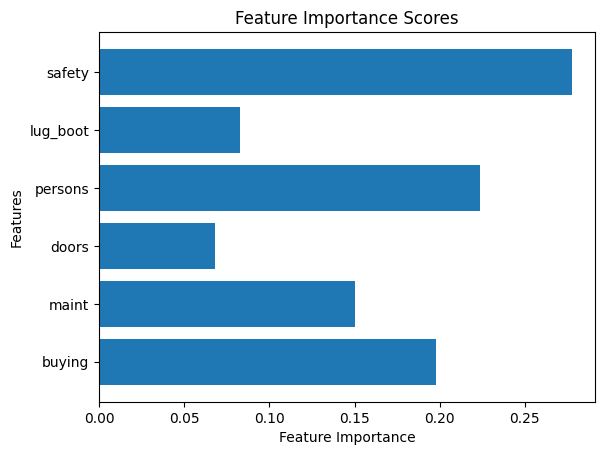

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X.columns, feature_importances_default)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
selected_features = ['maint', 'safety']
X_train_selected = X_train_enc[:, [X.columns.get_loc(col) for col in selected_features]]
X_test_selected = X_test_enc[:, [X.columns.get_loc(col) for col in selected_features]]
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier()

In [ ]:
y_pred_selected = rf_selected.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred_selected))

[[ 10   0  73   0]
 [  1   0  10   0]
 [ 11   0 224   0]
 [ 11   0   6   0]]


In [ ]:
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

         acc       0.30      0.12      0.17        83
        good       0.00      0.00      0.00        11
       unacc       0.72      0.95      0.82       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.25      0.27      0.25       346
weighted avg       0.56      0.68      0.60       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
